# 0.0 PLANEJAMENTO DA SOLUÇÃO

### 0.1 INPUT

 - PROBLEMA DE NEGOCIO
    -   SELECIONAR OS CLIENTES MAIS VALIOSOS PARA UM PROGRAMA DE FIDELIDADE
 - CONJUNTO DE DADOS
   -  VENDA DE UM ECOMMERCE ONLINE, DURANTE O PERIODO DE UM ANO

### 0.2 OUTPUT

- A INDICAÇÃO DAS PESSOAS QUE FARÃO PARTE DO PROGRAMA DE FIDELIDADE
    - LISTA: client_id | is_insider
- RELATORIO COM AS RESPOSTAS DAS PERGUNTAS DE NEGOCIO
    - QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    - QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    - QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    - QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO

### 0.3 TASKS

- QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    -   O QUE É SER ELEGIVEL? O QUE SÃO OS CLIENTES DE MAIOR VALOR?
    -   FATURAMENTO
        -   ALTO TICKET MEDIO
        -   ALTO LIFE TIME VALUE
        -   BAIXA RECÊNCIA
        -   ALTO BASKET SIZE
        -   BAIXA PROBABILIDADE DE CHURN
        -   ALTA PREVISÃO DE LTV
        -   ALTA PROPENSÃO DE COMPRA

    -   CUSTO
        -   BAIXA TAXA DE DEVOLUÇÃO

    -   EXPERIENCIA DE COMPRA
        -   MEDIA ALTA DAS AVALIAÇÕES

- QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    -   NUMERO TOTAL DE CLIENTES
    -   % DO NUMERO DE INSIDERS

- QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    -   ESCREVER CARACTERISTICAS DO CLIENTE
        -   IDADE
        -   LOCALIZAÇÃO

    - CARACTERISTICAS DO CONSUMO
        - FEATURES DA CLUSTERING

- QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - FATURAMENTO TOTAL E COMPARA COM O FATURAMENTO DO GRUPO

- QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - LTV DO INSIDERS
    - ANALISE DE COHORT

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - DEFINIR PERIODICIDADE (MES, 3 MESES...)
    - A PESSOA PRECISA SER PARECIDA COM OUTRA PESSOA DO GRUPO INSIDERS

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - DEFINIR PERIODICIDADE
    - A PESSOA PRECISA SER DISIMILAR DO RESTANTE DO GRUPO INSIDERS

- QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - TESTE A/B
    - TESTE A/B BAYESIANO
    - TESTE DE HIPÓTESES

- QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO
    - DESCONTO
    - PREFERENCIA DE COMPRA
    - FRETE
    - VISITA A EMPRESA

### 0.4 BENCHMARK - PESQUISA

- DESK RESEARCH

MODELO RFM
-   RECÊNCIA: TEMPO DESDE A ULTIMA COMPRA
    - ORDENA PELA RECÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   FREQUÊNCIA: QUANTIDADE DE COMPRA FEITAS NA EMPRESA
    - ORDENA PELA FREQUÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   MONETÁRIA: TOTAL GASTO, "HIGH-VALUE PURCHASE"
    - ORDENA PELA MONETÁRIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA

- FAZ A MÉDIA DAS 3 NOTAS E ORDENA PELA MAIOR NOTA

- SEGMENTAÇÃO: PELA 2 DAS NOTAS, E BOTA A TERCEIRA NOTA COMO COR NO GRÁFICO

# 1.0 IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display        import HTML
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer

## 1.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.2 LOAD DATA

In [3]:
df = pd.read_csv( 'Ecommerce.csv', encoding = "ISO-8859-1" )
df1 = df.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df1.shape

(541909, 8)

In [5]:
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391287,570666,23511,EMBROIDERED RIBBON REEL EMILY,6,9-Oct-17,2.08,13919.0,Denmark
425275,573314,22560,TRADITIONAL MODELLING CLAY,2,26-Oct-17,1.25,16987.0,United Kingdom
510118,579430,23136,IVORY WIRE SWEETHEART LETTER TRAY,1,27-Nov-17,3.75,12748.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,29-Nov-16,3.37,16029.0,United Kingdom
221088,556237,16207A,PINK STRAWBERRY HANDBAG,1,7-Jun-17,2.46,NaN,United Kingdom


# 2.0 DESCRIÇÃO DOS DADOS

In [6]:
df2 = df1.copy()

## 2.1 Rename Columns

In [7]:
cols = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df2.columns = cols
df2.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 2.2 Data dimensions

In [8]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 2.3 Data types

In [9]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 Check NA

In [10]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 Replace NA

In [11]:
# remove na
df2 = df2.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}'.format( 1 - (df2.shape[0] / df1.shape[0] ) ) )

Removed data: 0.25


In [12]:
df2.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 2.6 Change Dtypes

In [13]:
# invoice date
df2['invoice_date'] = pd.to_datetime( df2['invoice_date'], format='%d-%b-%y' )

# customer id
df2['customer_id'] = df2['customer_id'].astype(int)

In [14]:
df2.sample(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
363987,568593,23196,VINTAGE LEAF MAGNETIC NOTEPAD,12,2017-09-26,1.45,13988,United Kingdom


In [15]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 2.7 Descriptive Statistics

# 3.0 FEATURE ENGINEERING

In [16]:
df3 = df2.copy()

## 3.1 Feature Creation

In [17]:
df3.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [18]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 'description',
                    'quantity', 'invoice_date', 'unit_price',
                    'country'], axis=1 ).drop_duplicates( ignore_index=True )
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [19]:
# Gross Revenue (Faturamento) quantity * price = faturamento
df3['gross_revenue'] = df3['quantity'] * df3['unit_price']

# Monetary
df_monetary = df3[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency
df_recency = df3[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# Frequency
df_frequency = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )

# 4.0 DATA FILTERING

In [20]:
df4 = df_ref.copy()

# 5.0 EDA

In [21]:
df5 = df4.copy()

# 6.0 DATA PREPARATION

In [22]:
df6 = df5.copy()

# 7.0 FEATURE SELECTION

In [23]:
df7 = df6.copy()

# 8.0 HYPERPARAMETER FINE TUNNING

In [24]:
X = df7.drop(columns = ['customer_id'], axis=1)

In [25]:
clusters = [2, 3, 4, 5, 6]

## 8.1 Within-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

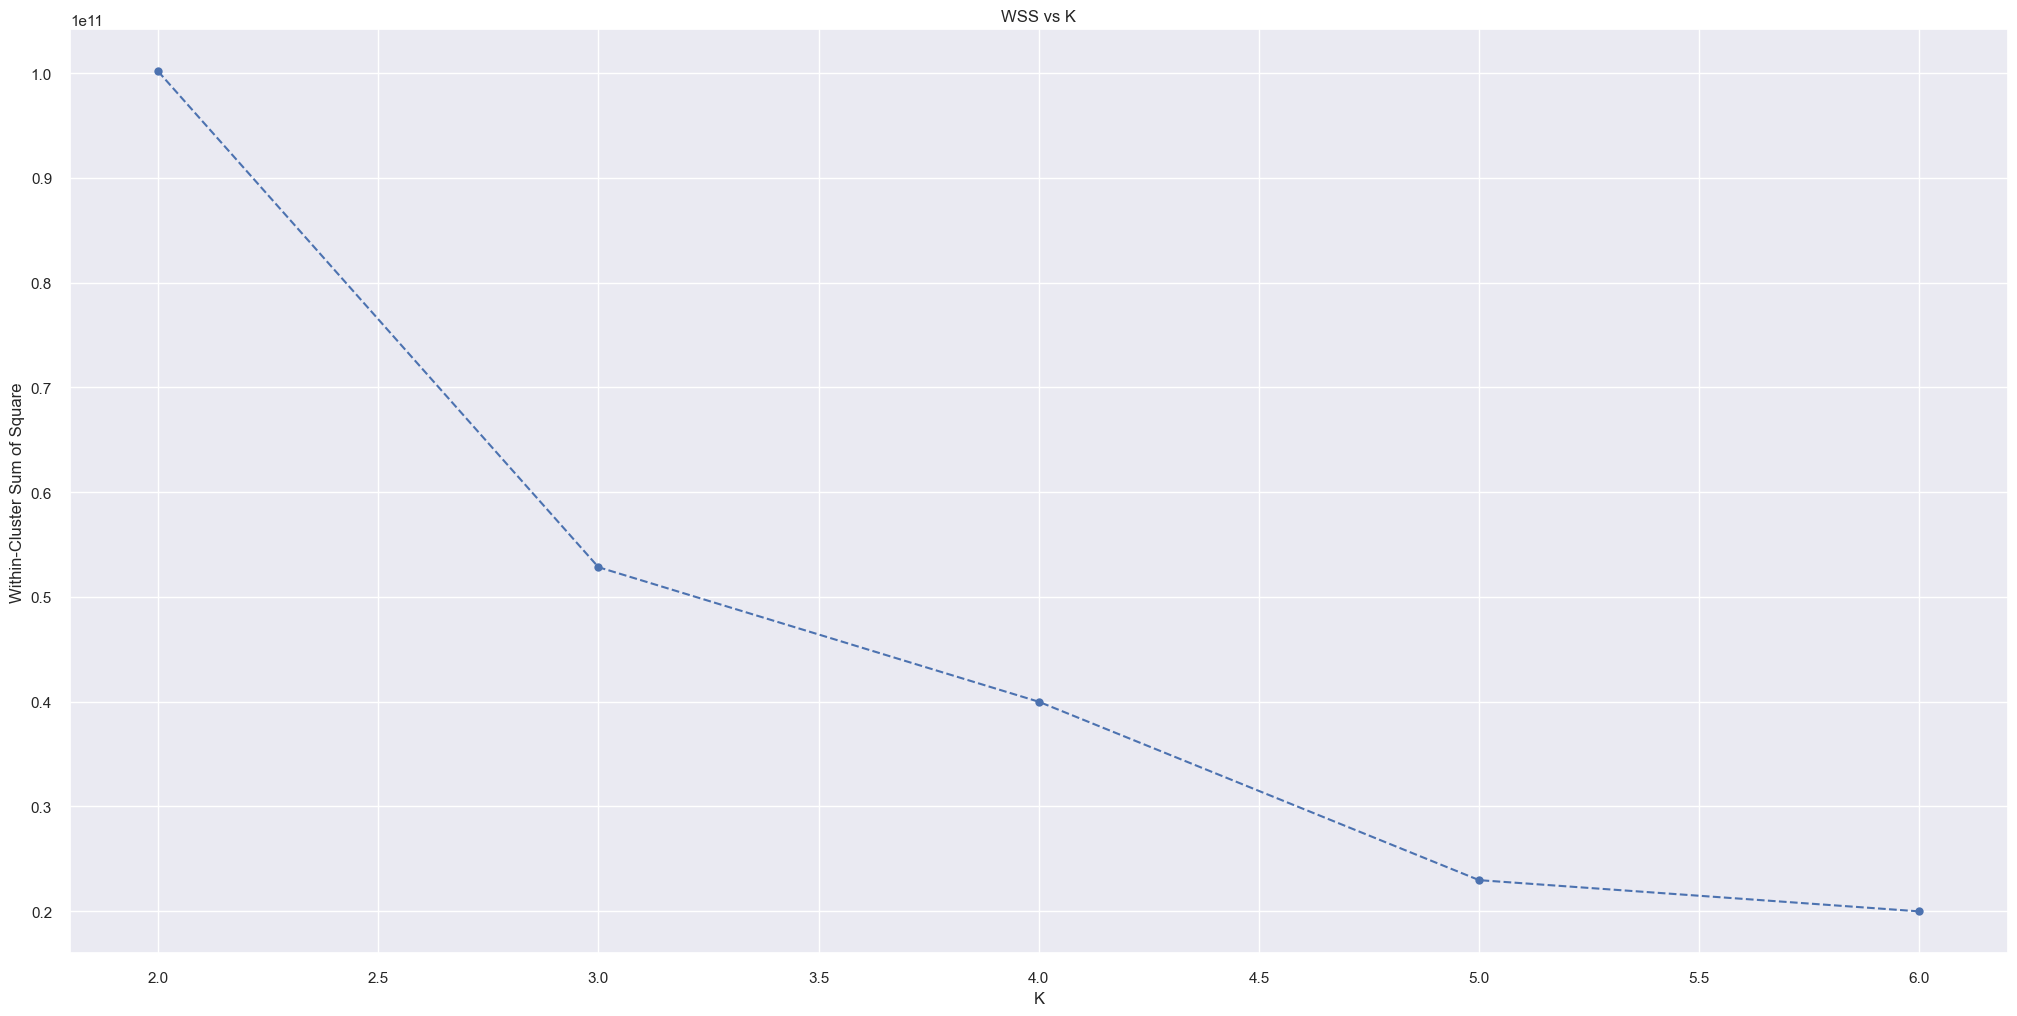

In [26]:
# método raíz
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit( X )
    
    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' )
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs K')

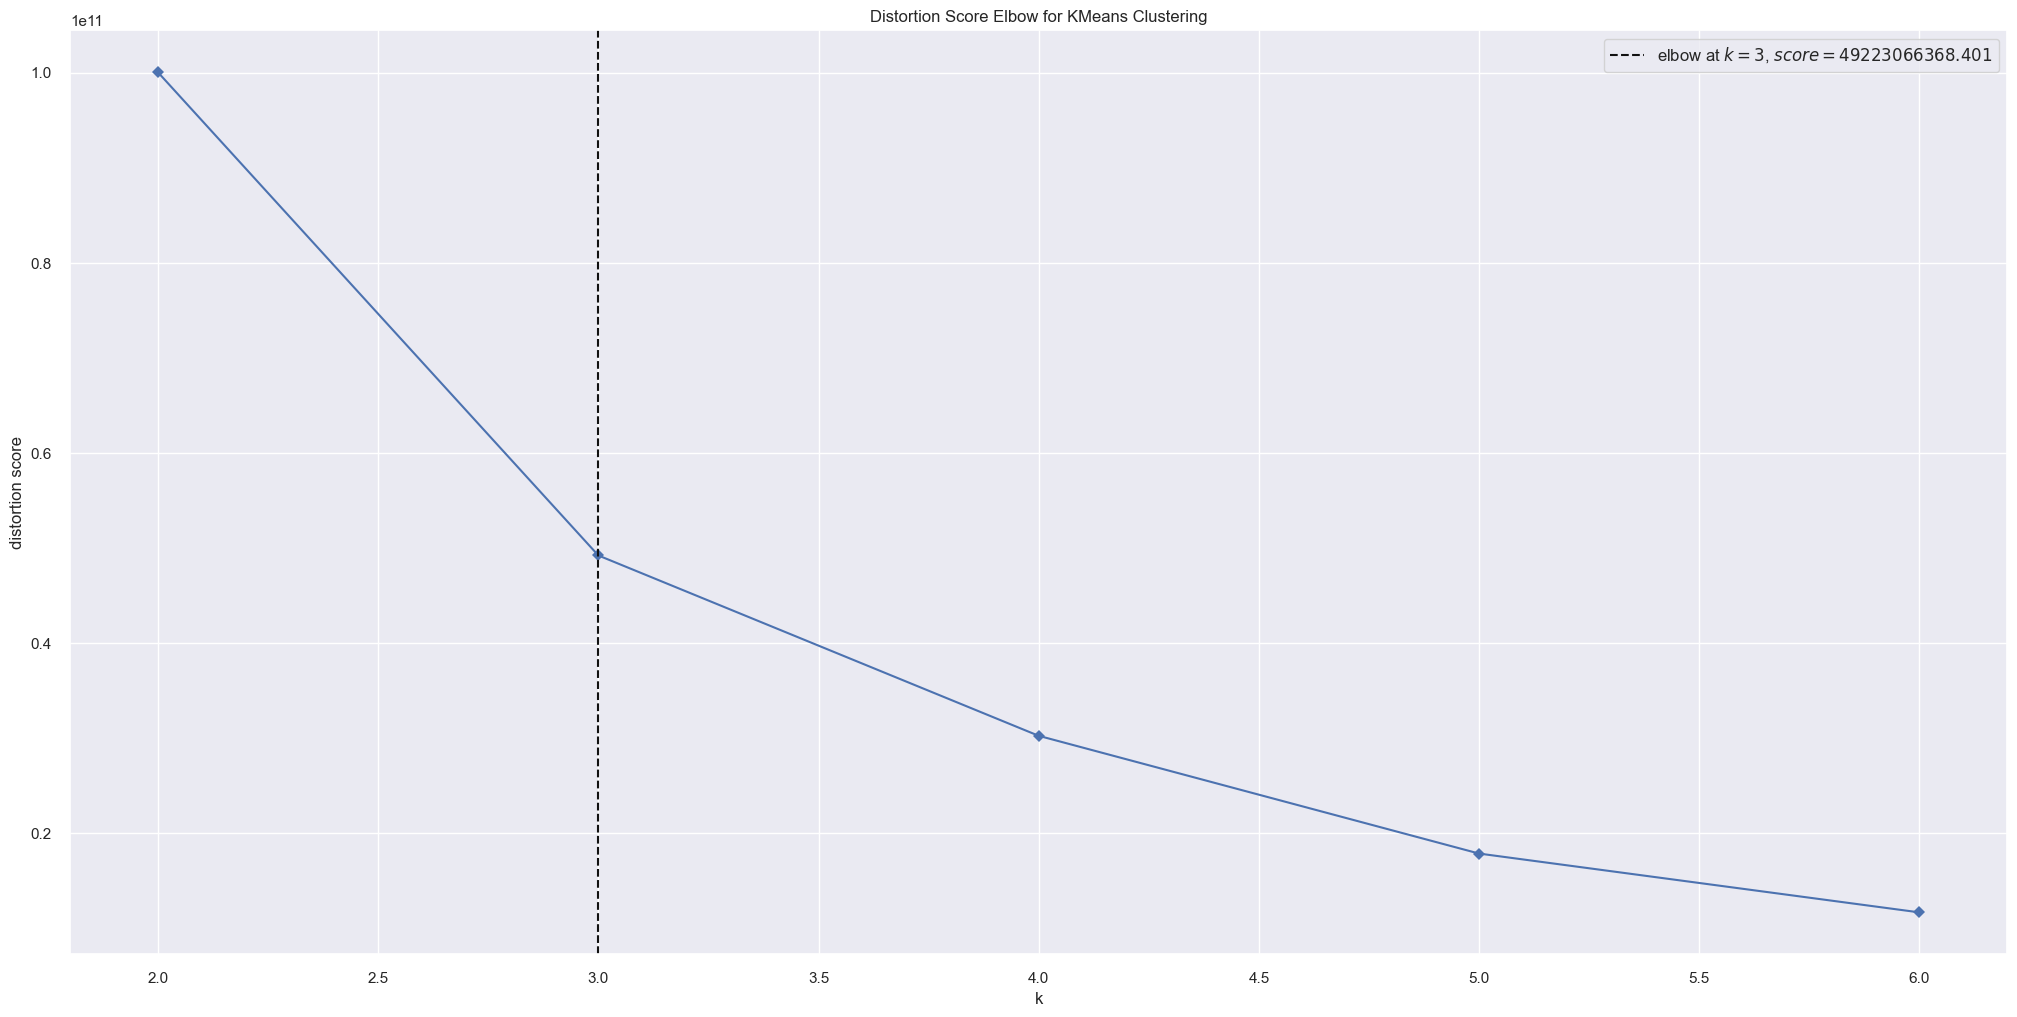

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

In [28]:
wss

[100161464120.90083,
 52830442008.00697,
 39986809769.41452,
 22956286930.931797,
 19974463394.76879]

## 8.2 Silhouette Score

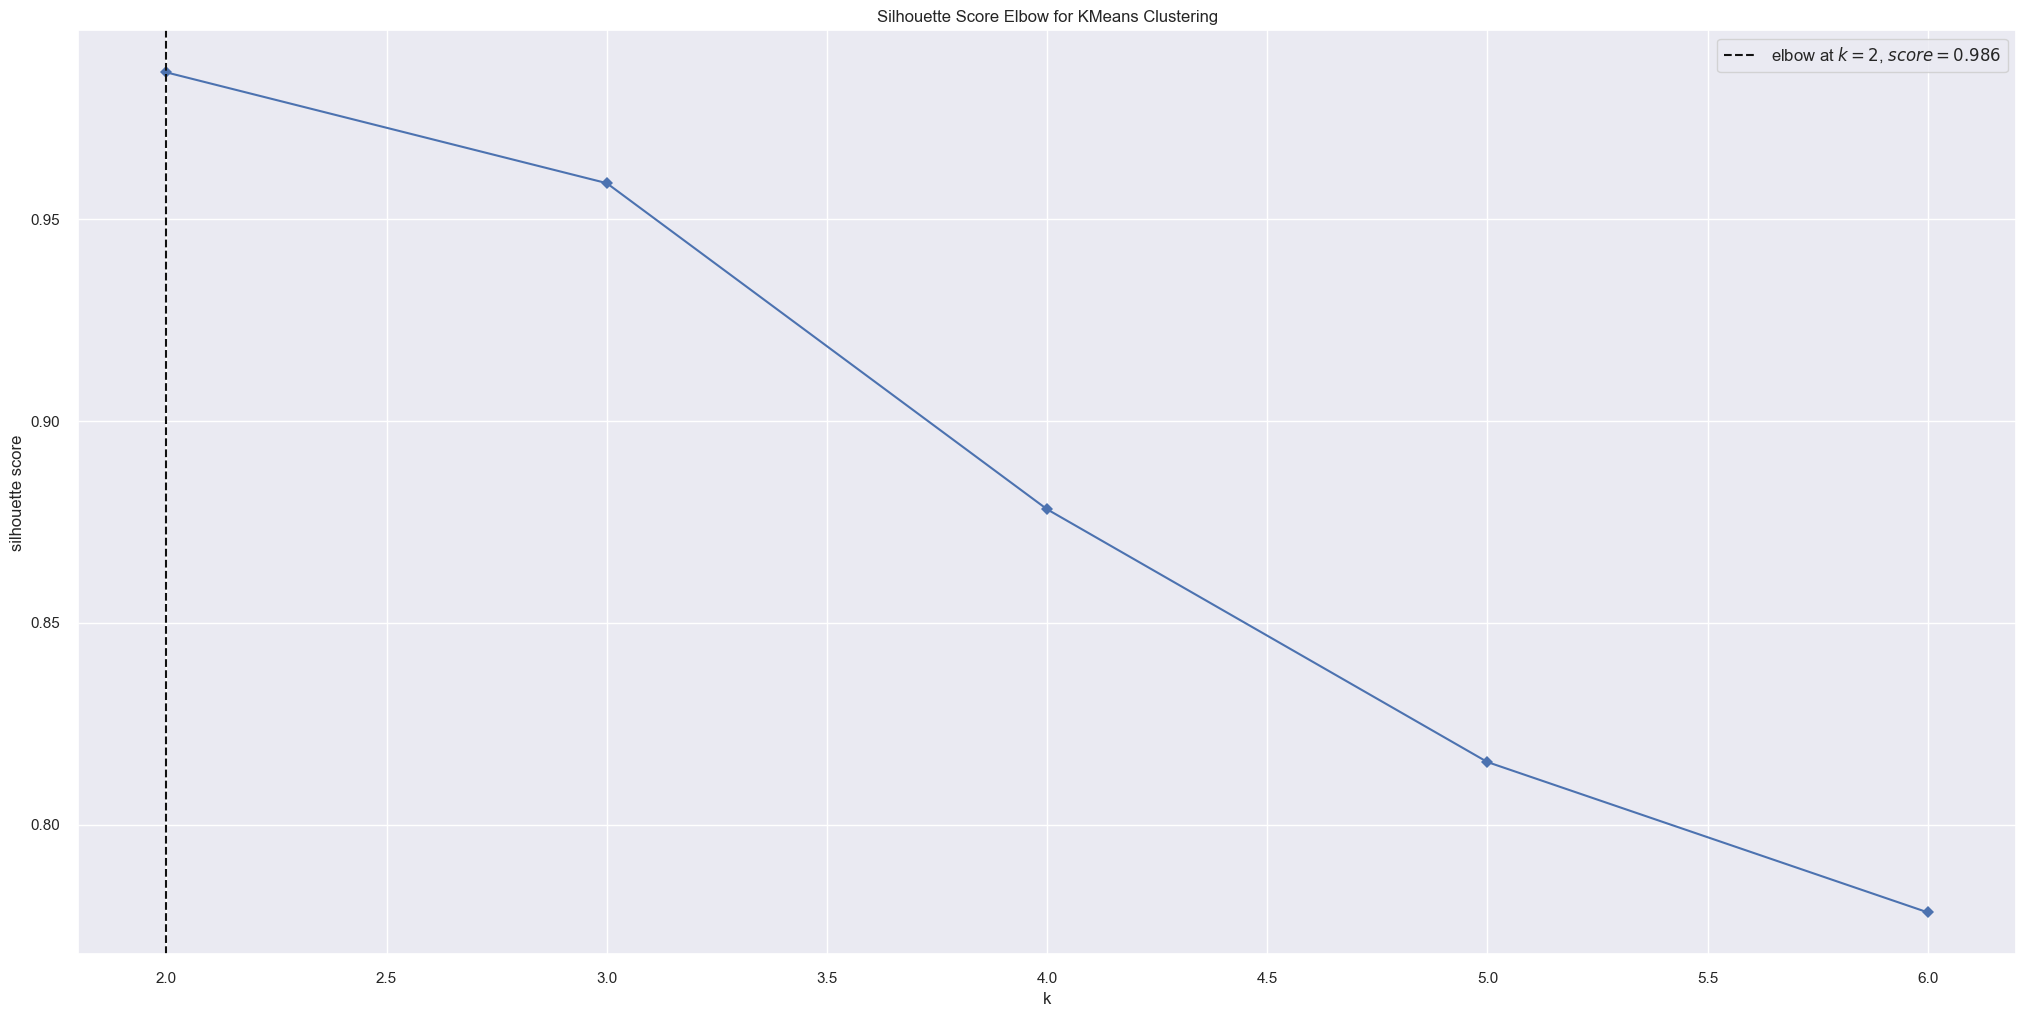

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

# 9.0 MODEL TRAINING

# 10.0 CLUSTER ANALYSIS

# 11.0 DEPLOY TO PRODUCTION